Group Details 

AMBUJ MISHRA (202116003)


ARPITA NEMA (202116004)


**Research Paper** - https://drive.google.com/file/d/1rrGSKXGv9IyLp8pZFiekBSD8lkGEiMhy/view?usp=sharing


**NOTE - While executing this COLAB notebook if in case some error occurs then *please RESTART COLAB RUNTIME*. It has been found sometimes dependencies clash happens while installing spark in COLAB environment.**




In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [ ]:
!sudo add-apt-repository ppa:webupd8team/java
!sudo apt-get update
!sudo apt-get install oracle-java8-installer

 The Oracle JDK License has changed for releases starting April 16, 2019.

The new Oracle Technology Network License Agreement for Oracle Java SE is substantially different from prior Oracle JDK licenses. The new license permits certain uses, such as personal use and development use, at no cost -- but other uses authorized under prior Oracle JDK licenses may no longer be available. Please review the terms carefully before downloading and using this product. An FAQ is available here: https://www.oracle.com/technetwork/java/javase/overview/oracle-jdk-faqs.html

Oracle Java downloads now require logging in to an Oracle account to download Java updates, like the latest Oracle Java 8u211 / Java SE 8u212. Because of this I cannot update the PPA with the latest Java (and the old links were broken by Oracle).

For this reason, THIS PPA IS DISCONTINUED.

UPDATE:

For Oracle Java 17, see a different PPA -> https://www.linuxuprising.com/2021/09/how-to-install-oracle-java-17-lts-on.html

Old descr

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 15 kB/s 
     |████████████████████████████████| 198 kB 45.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=75b0e7f452ffab7d653b358f07cece4f31965b6c18d852ebe32888e79d02df3b
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
!pip3 install pyspark.pandas

  Created wheel for pyspark.pandas: filename=pyspark_pandas-0.0.7-py3-none-any.whl size=7860 sha256=a16599bf24b9b0c51090ffa58827a293bc578f2b42bb66913320142e31532c0f
  Stored in directory: /root/.cache/pip/wheels/b3/fb/fa/a514a87218dddb592f879419706e25351cd8022edbe90d4953
Successfully built pyspark.pandas


In [ ]:
import numpy as np

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
type(spark)

pyspark.sql.session.SparkSession

In [ ]:
sc=spark.sparkContext

In [ ]:
import pandas as pd
import pyspark as ps

In [ ]:
folder_path = "/content/drive/MyDrive/Big Data - Research Paper Implementation/BC-TCGA/"

In [ ]:
normal = pd.read_csv(folder_path+"BC-TCGA-Normal.txt",sep = '\t', index_col=0).T
normal['label'] = 0
normal.head()

Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
TCGA-BH-A0AY-11A-23R-A089-07,0.204333,-0.24200,0.591875,0.53850,0.707667,0.27550,-0.117167,0.5185,-0.018375,-0.059,...,0.27325,0.886167,-0.0019,0.8730,2.87875,1.3782,-0.2629,3.4080,0.0620,0
TCGA-A7-A0DB-11A-33R-A089-07,0.869417,0.87825,-0.024625,0.81950,1.932333,-0.41750,0.570833,0.5010,-2.131375,0.595,...,0.05650,0.777833,0.7566,0.0800,2.99675,-2.3094,-0.5891,4.9350,1.3084,0
TCGA-BH-A0HK-11A-11R-A089-07,0.064500,0.27350,0.477750,0.29025,0.990000,-0.10875,0.204333,0.0350,-0.524625,0.011,...,0.09950,-0.675333,0.3209,0.7240,2.37325,0.9223,-0.3169,1.8055,0.1157,0
TCGA-BH-A0BM-11A-12R-A089-07,-0.186250,-0.81450,0.701875,0.23350,-1.705667,0.93925,-0.468167,0.5755,0.112875,-0.118,...,0.06150,-0.154500,0.2012,-0.3145,2.51475,0.2730,-0.0239,1.5475,-0.6154,0
TCGA-BH-A0B3-11B-21R-A089-07,0.063250,-0.74650,0.628750,0.44275,0.700167,0.10675,-0.376667,0.4775,0.179500,-0.344,...,-0.13250,0.833667,0.3210,0.0525,2.79675,0.4662,-0.3032,3.1270,0.0214,0


In [ ]:
tumor = pd.read_csv(folder_path+"BC-TCGA-Tumor.txt",sep = '\t', index_col=0).T
tumor['label'] = 1
tumor.head()

Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,label
TCGA-AO-A03P-01A-11R-A00Z-07,1.219417,-0.15225,2.193375,-0.21875,-0.148667,-1.95500,0.210833,0.42975,-0.970875,0.5230,...,-0.33500,-1.328000,-0.0455,1.2465,1.68925,2.3849,-0.3681,-0.2500,-1.2010,1
TCGA-A8-A06T-01A-11R-A00Z-07,0.430333,0.44450,-0.100625,-0.16750,-0.206000,-2.01850,0.142500,-0.90075,-2.210625,0.4970,...,0.23275,-1.152167,-0.0916,1.0970,2.41500,1.9061,0.0628,-0.5125,-0.7830,1
TCGA-A8-A07F-01A-11R-A00Z-07,0.439833,1.88225,0.055625,-0.02600,0.970167,-3.25750,-0.194333,-0.73925,-0.200375,0.2415,...,-0.65425,-1.312500,-0.1634,-0.7200,2.02300,-0.0164,0.0586,-1.0520,-0.1376,1
TCGA-A8-A081-01A-11R-A00Z-07,1.242667,1.78100,0.269500,0.14975,-1.073167,-2.74075,0.379667,-0.23675,-1.778500,0.7610,...,-0.10100,0.157833,0.5051,0.8155,2.98450,0.2366,0.4729,-1.7740,0.9057,1
TCGA-A8-A08C-01A-11R-A00Z-07,-0.228333,0.53350,0.722375,0.42750,-0.283667,-1.84800,-0.554000,0.09875,-1.851000,0.7265,...,-0.49950,0.043833,-0.7107,0.3055,1.50475,-0.0900,-0.1396,-0.2945,-1.2060,1


In [ ]:
finalDF = pd.concat([normal, tumor], axis = 0)
finalDF.shape

(590, 17815)

In [ ]:
list_int = list(range(1,finalDF.shape[1]))
list_int = list(map(str, list_int))
finalDF.columns = list_int+['label']


finalDF = finalDF.fillna(0)

In [ ]:
finalDF['label'].value_counts()

1    529
0     61
Name: label, dtype: int64

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [ ]:
spark.stop()
sc.stop()

In [ ]:
from pyspark import SparkConf

conf = SparkConf().setAppName("app1").setMaster("local")
sc = SparkContext(conf=conf)

In [ ]:
# sc = SparkContext().getOrCreate()
sqlContext = SQLContext(sc)

data = sqlContext.createDataFrame(finalDF)
print(data.printSchema())

root
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- 21: double (nullable = true)
 |-- 22: double (nullable = true)
 |-- 23: double (nullable = true)
 |-- 24: double (nullable = true)
 |-- 25: double (nullable = true)
 |-- 26: double (nullable = true)
 |-- 27: double (nullable = true)
 |-- 28: double (nullable = true)
 |-- 29: double (nullable = true)
 |-- 30: double (n

In [ ]:
features = np.array(finalDF.columns[:-1])
features

array(['1', '2', '3', ..., '17812', '17813', '17814'], dtype=object)

In [ ]:
va = VectorAssembler(inputCols = features, outputCol='features')

In [ ]:
va_df = va.transform(data)

In [ ]:
va_df = va_df.select(['features', 'label'])
va_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.20433333333333...|    0|
|[0.86941666666666...|    0|
|[0.0645,0.2735,0....|    0|
+--------------------+-----+
only showing top 3 rows



In [ ]:
(train,test) = va_df.randomSplit([0.60,0.40])

# Using Linear SVM

In [ ]:
lsvc = LinearSVC(labelCol = 'label', maxIter=100, regParam=1)

# Fit the model
lsvc = lsvc.fit(train)
pred = lsvc.transform(test)

# Print the coefficients and intercept for linearsSVC
print("Coefficients: " + str(lsvc.coefficients))
print("Intercept: " + str(lsvc.intercept))


Coefficients: [0.000997988305991808,0.0008272458452177005,-1.8882738153419444e-05,-7.799662237333394e-05,0.00023550902940202878,-0.0008499072339032922,0.0001011034897151776,-0.0003928888579226145,-2.195122431112014e-05,0.000325328057933178,0.00018028633588159425,-0.0012599678937487203,-0.0007620571254114654,-7.97808821974229e-06,1.1239338518654111e-05,9.110421200008071e-05,-0.0005716995867426435,0.0005893202634195019,-0.00011144990588754037,-0.0006799727715954473,-0.00020921232243738144,-7.260748887351195e-05,5.068182423194839e-05,0.0001802278754110034,-1.7625441360834834e-05,0.0003295168287283406,0.0012437158509924521,0.00012865171992150284,0.00012293998586845122,0.0015645630134223747,-1.6336493185560727e-05,0.0009194438359530608,-6.529940328509639e-07,0.0001423452930953386,-3.432126653919601e-06,-0.0005097083197112533,-8.625716002921132e-05,5.9604021288699225e-05,0.000126215198796387,0.0012846578123060733,-0.00020977206220088496,0.00010843004738123831,8.276064381323913e-05,-3.0413385

In [ ]:
pred.show(3)

+--------------------+-----+--------------------+----------+
|            features|label|       rawPrediction|prediction|
+--------------------+-----+--------------------+----------+
|[-1.7185,0.487,1....|    0|[2.67598165752191...|       0.0|
|[-1.5249166666666...|    1|[-2.0767198648913...|       1.0|
|[-1.2055833333333...|    0|[2.12796709186143...|       0.0|
+--------------------+-----+--------------------+----------+
only showing top 3 rows



In [ ]:
evaluator=MulticlassClassificationEvaluator(metricName="accuracy")
acc = evaluator.evaluate(pred)
 
print("Prediction Accuracy: ", acc)

y_pred=pred.select("prediction").collect()
y_orig=pred.select("label").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm) 

Prediction Accuracy:  0.9915254237288136
Confusion Matrix:
[[ 31   0]
 [  2 203]]


# Using Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(featuresCol="features", labelCol="label")

dtc = dtc.fit(train)
pred_dtc = dtc.transform(test)

In [ ]:
pred_dtc.show(3)

+--------------------+-----+-------------+-----------+----------+
|            features|label|rawPrediction|probability|prediction|
+--------------------+-----+-------------+-----------+----------+
|[-1.7185,0.487,1....|    0|   [29.0,0.0]|  [1.0,0.0]|       0.0|
|[-1.5249166666666...|    1|  [0.0,320.0]|  [0.0,1.0]|       1.0|
|[-1.2055833333333...|    0|  [0.0,320.0]|  [0.0,1.0]|       1.0|
+--------------------+-----+-------------+-----------+----------+
only showing top 3 rows



In [ ]:
evaluator=MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
acc_dtc = evaluator.evaluate(pred_dtc)
 
print("Prediction Accuracy: ", acc_dtc)
 
y_pred_dtc=pred_dtc.select("prediction").collect()
y_orig_dtc=pred_dtc.select("label").collect()

cm_dtc = confusion_matrix(y_orig_dtc, y_pred_dtc)
print("Confusion Matrix:")
print(cm_dtc)

Prediction Accuracy:  0.9830508474576272
Confusion Matrix:
[[ 28   3]
 [  1 204]]


# Using Random Forest

In [ ]:
rfc = RandomForestClassifier(featuresCol="features", labelCol="label")
rfc = rfc.fit(train)
pred_rfc = rfc.transform(test)

In [ ]:
pred_rfc.show(3) 

+--------------------+-----+-------------+-----------+----------+
|            features|label|rawPrediction|probability|prediction|
+--------------------+-----+-------------+-----------+----------+
|[-1.7185,0.487,1....|    0|   [17.0,3.0]|[0.85,0.15]|       0.0|
|[-1.5249166666666...|    1|   [1.0,19.0]|[0.05,0.95]|       1.0|
|[-1.2055833333333...|    0|   [8.0,12.0]|  [0.4,0.6]|       1.0|
+--------------------+-----+-------------+-----------+----------+
only showing top 3 rows



In [ ]:
evaluator=MulticlassClassificationEvaluator(predictionCol="prediction", metricName="accuracy")
acc_rfc = evaluator.evaluate(pred_rfc)
 
print("Prediction Accuracy: ", acc_rfc)
 
y_pred_rfc=pred_rfc.select("prediction").collect()
y_orig_rfc=pred_rfc.select("label").collect()

cm_rfc = confusion_matrix(y_orig_rfc, y_pred_rfc)
print("Confusion Matrix:")
print(cm_rfc)

Prediction Accuracy:  0.9745762711864406
Confusion Matrix:
[[ 27   4]
 [  2 203]]


In [ ]:
!pip3 install handyspark

In [ ]:
from handyspark import *

# Making ROC and PR curves

In [ ]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
import matplotlib.pyplot as plt

## For linear SVM

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol='label')

# We have only two choices: area under ROC and PR curves :-(
auroc = evaluator.evaluate(pred, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(pred, {evaluator.metricName: "areaUnderPR"})
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.9997
Area under PR Curve: 1.0000


## For Decision Tree Classifier

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol='label')

# We have only two choices: area under ROC and PR curves :-(
auroc = evaluator.evaluate(pred_dtc, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(pred_dtc, {evaluator.metricName: "areaUnderPR"})
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.9650
Area under PR Curve: 0.9899


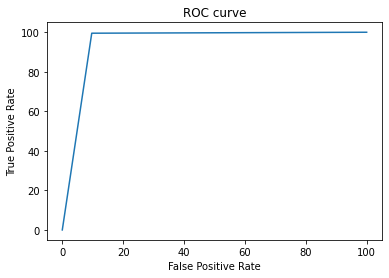

In [ ]:
import matplotlib.pyplot as plt

# Create a Pipeline estimator and fit on train DF, predict on test DF
# model = estimator.fit(train)
# predictions = model.transform(test)

# Returns as a list (false positive rate, true positive rate)
preds = pred_dtc.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0]*100 for x in points]
y_val = [x[1]*100 for x in points]
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_val, y_val)

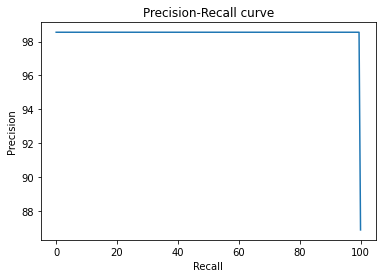

In [ ]:
import matplotlib.pyplot as plt

# Create a Pipeline estimator and fit on train DF, predict on test DF
# model = estimator.fit(train)
# predictions = model.transform(test)

# Returns as a list (false positive rate, true positive rate)
preds = pred_dtc.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('pr')

plt.figure()
x_val = [x[0]*100 for x in points]
y_val = [x[1]*100 for x in points]
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(x_val, y_val)

In [ ]:
metrics = CurveMetrics(preds)
print(metrics.get_curve('fMeasureByThreshold'))
print(metrics.get_curve('precisionByThreshold'))
print(metrics.get_curve('recallByThreshold'))

[(1.0, 0.9902912621359223), (0.0, 0.9297052154195011)]
[(1.0, 0.9855072463768116), (0.0, 0.8686440677966102)]
[(1.0, 0.9951219512195122), (0.0, 1.0)]


## For Random-Forest Classifier

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol='label')

# We have only two choices: area under ROC and PR curves :-(
auroc = evaluator.evaluate(pred_rfc, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(pred_rfc, {evaluator.metricName: "areaUnderPR"})
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.9982
Area under PR Curve: 0.9997


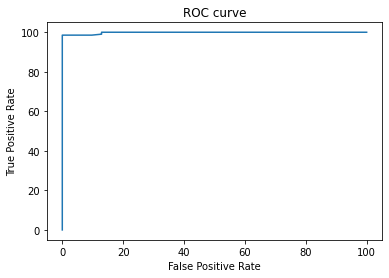

In [ ]:
import matplotlib.pyplot as plt

# Create a Pipeline estimator and fit on train DF, predict on test DF
# model = estimator.fit(train)
# predictions = model.transform(test)

# Returns as a list (false positive rate, true positive rate)
preds = pred_rfc.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0]*100 for x in points]
y_val = [x[1]*100 for x in points]
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_val, y_val)

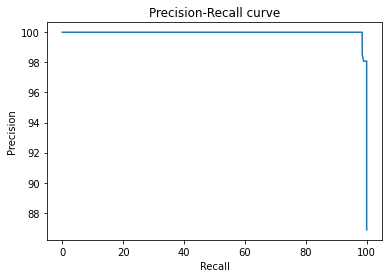

In [ ]:
import matplotlib.pyplot as plt

# Create a Pipeline estimator and fit on train DF, predict on test DF
# model = estimator.fit(train)
# predictions = model.transform(test)

# Returns as a list (false positive rate, true positive rate)
preds = pred_rfc.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('pr')

plt.figure()
x_val = [x[0]*100 for x in points]
y_val = [x[1]*100 for x in points]
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(x_val, y_val)

In [ ]:
metrics = CurveMetrics(preds)
print(metrics.get_curve('fMeasureByThreshold'))
print(metrics.get_curve('precisionByThreshold'))
print(metrics.get_curve('recallByThreshold'))

[(1.0, 0.8352272727272727), (0.95, 0.943298969072165), (0.9, 0.9775561097256857), (0.85, 0.9876543209876543), (0.7, 0.9901477832512315), (0.65, 0.9926289926289926), (0.6, 0.9853658536585366), (0.55, 0.9854368932038836), (0.5, 0.9878934624697335), (0.45, 0.9903381642512078), (0.3, 0.9879518072289156), (0.25, 0.9832134292565947), (0.2, 0.9692671394799055), (0.15, 0.9534883720930233), (0.1, 0.9425287356321839), (0.05, 0.9403669724770642), (0.0, 0.9297052154195011)]
[(1.0, 1.0), (0.95, 1.0), (0.9, 1.0), (0.85, 1.0), (0.7, 1.0), (0.65, 1.0), (0.6, 0.9853658536585366), (0.55, 0.9806763285024155), (0.5, 0.9807692307692307), (0.45, 0.9808612440191388), (0.3, 0.9761904761904762), (0.25, 0.9669811320754716), (0.2, 0.9403669724770642), (0.15, 0.9111111111111111), (0.1, 0.8913043478260869), (0.05, 0.8874458874458875), (0.0, 0.8686440677966102)]
[(1.0, 0.7170731707317073), (0.95, 0.8926829268292683), (0.9, 0.9560975609756097), (0.85, 0.975609756097561), (0.7, 0.9804878048780488), (0.65, 0.985365853